In [315]:
"""
Created on Thu Sep 30 10:15:33 2021

@author: kirahart
"""

from SQL import create_db_connection, execute_query, read_query
import h5py
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title




In [316]:
dftelem = pd.read_csv('/Volumes/KESU/SQL_Queries/Measurements.csv')

In [ ]:
#user_info
pw = "p0larizati0n"
user = "root"
db = "IRCSP"

#connect to IRCSP database
connection = create_db_connection("localhost", user, pw, db)

In [318]:
def query_wavelength(db, wavelength, pos):
    string = ''' SELECT id, pos, camera, val \n'''
    string += '''FROM '''+ db + ''' \n'''
    string+= '''WHERE wavelength = ''' + str(wavelength) + ''' AND position = ''' +str(position)+''';'''
    
query_wavelength('IRCSP.scaleddata', wavelength, pos)
    

In [317]:
x1 = dftelem.query('meas_id>1366')['cam1_temp']
xhum = dftelem.query('meas_id>1366')['humidity']

q = 'position==125 & id>1366'

x = df8.query(q)['id']
y8 = df8.query(q)['val']
y9 = df9.query(q)['val']
y10 = df10.query(q)['val']
y11 = df11.query(q)['val']

x2 = df82.query(q)['id']
y82 = df82.query(q)['val']
y92 = df92.query(q)['val']
y102 = df102.query(q)['val']
y112 = df112.query(q)['val']


UndefinedVariableError: name 'id' is not defined

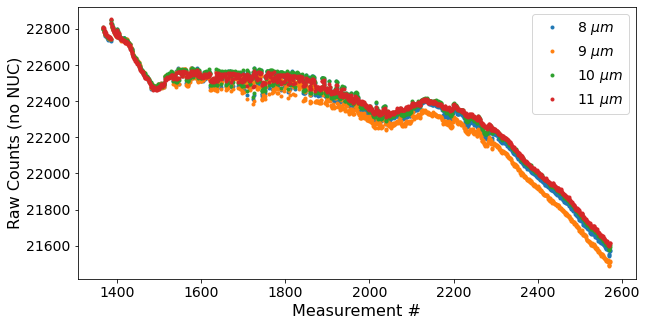

In [258]:
plt.figure(figsize=(10, 5))
plt.plot(x,y8, '.',label = '8 $ \mu m$')
plt.plot(x,y9, '.',label = '9 $ \mu m$')
plt.plot(x,y10, '.',label = '10 $ \mu m$')
plt.plot(x,y11, '.',label = '11 $ \mu m$')
plt.legend()
plt.xlabel('Measurement #')
plt.ylabel('Raw Counts (no NUC)')
plt.show()

In [190]:
x1 = dftelem.query('meas_id>1366 & cam1_temp < 37')['cam1_temp']
xhum = dftelem.query('meas_id>1366 & cam1_temp < 37')['humidity']
x= dftelem.query('meas_id>1366 & cam1_temp < 37')['meas_id']

dfselect8 = df8.loc[df8['id'].isin(x)]
dfs8 = dfselect8.loc[dfselect8['position']==125]

dfselect9 = df9.loc[df9['id'].isin(x)]
dfs9 = dfselect9.loc[dfselect9['position']==125]

dfselect10 = df10.loc[df10['id'].isin(x)]
dfs10 = dfselect10.loc[dfselect10['position']==125]

dfselect11 = df11.loc[df11['id'].isin(x)]
dfs11 = dfselect11.loc[dfselect10['position']==125]

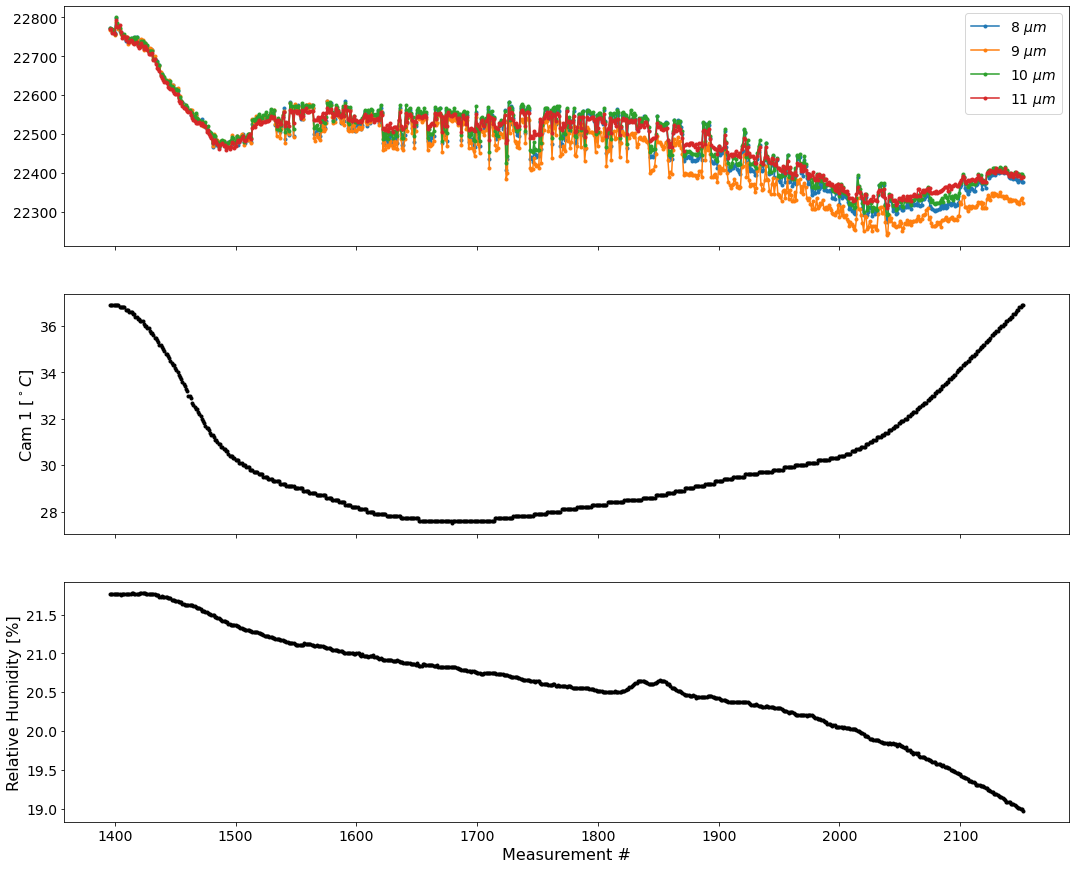

In [238]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (18,15),sharex = True)
ax[0].plot(x,np.array(dfs8['val']),'.-',label = '8 $ \mu m$')
ax[0].plot(x,np.array(dfs9['val']),'.-',label = '9 $ \mu m$')
ax[0].plot(x,np.array(dfs10['val']),'.-',label = '10 $ \mu m$')
ax[0].plot(x,np.array(dfs11['val']),'.-',label = '11 $ \mu m$')
ax[0].legend()


ax[1].plot(x,x1,'k.' )
ax[1].set_ylabel( "Cam 1 [$^\circ C$]")

ax[2].plot(x,xhum,'k.')
ax[2].set_ylabel( "Relative Humidity [%]")
ax[2].set_xlabel( "Measurement #")
plt.show()


In [306]:
#filenames
fn = '/Volumes/KESU/SQL_Queries/raw_data/spectral_meas1000.csv'
fng = '/Volumes/KESU/SQL_Queries/raw_data/spectral_meas700.csv'

#create databases 
df = pd.read_csv(fn)
df1 = df.loc[df['camera']==1]
df1 = df1.loc[df1['position']==124]

df = pd.read_csv(fng)
df1g = df.loc[df['camera']==1]
df1g = df1g.loc[df1g['position']==124]

df = pd.read_csv(fn)
df2 = df.loc[df['camera']==2]
df2 = df2.loc[df2['position']==151]

df = pd.read_csv(fng)
df2g = df.loc[df['camera']==2]
df2g = df2g.loc[df2g['position']==151]

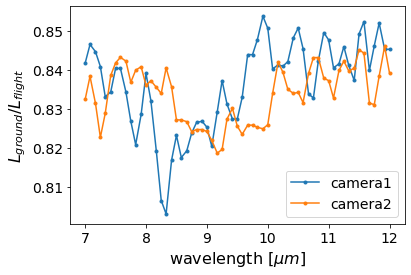

In [308]:
plt.plot(df1['wavelength'],(df1['val']-21800)/(df1g['val']-21800),'.-', label = "camera1")
plt.plot(df1['wavelength'],(df2['val']-21200)/(df2g['val']-21200),'.-', label = "camera2")
plt.xlabel('wavelength [$\mu m$]')
plt.ylabel('$L_{ground}/L_{flight}$')
plt.legend()